In [152]:
import requests
import json
import os
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint
from config import api_key
import random
import matplotlib.colors as mcolors
from pandas_profiling import ProfileReport

allmovies_df= pd.read_csv("data/allmoviesdata.csv")
allmovies_df


,Movie ID,Rank,Title,Production Budget,Domestic Gross,Worldwide Gross,Main Genre,2nd Genre,3rd Genre,IMDB Rating,Studio,Year,IMDb ID,Director
0,0,48,Black Panther,"200,000,000.00","700,059,566.00","1,336,494,320.00",Action,Adventure,Drama,7.40,Walt Disney Pictures,2018,NaN,Ryan Coogler
1,1,5,Avengers: Infinity War,"300,000,000.00","678,815,482.00","2,048,359,754.00",Action,Adventure,Sci-Fi,8.50,Walt Disney Pictures,2018,NaN,"Anthony Russo, Joe Russo"
2,2,50,Incredibles 2,"200,000,000.00","608,581,744.00","1,242,805,359.00",Animation,Action,Adventure,7.80,Pixar,2018,NaN,Brad Bird
3,3,144,Jurassic World: Fallen Kingdom,"170,000,000.00","417,719,760.00","1,308,323,302.00",Action,Adventure,Drama,6.20,Universal Pictures,2018,NaN,J.A. Bayona
4,4,11,Solo: A Star Wars Story,"275,000,000.00","213,767,512.00","393,151,347.00",Action,Adventure,Drama,7.00,Walt Disney Pictures,2018,NaN,Ron Howard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,204,"4,918",Annie Hall,"4,000,000.00","38,251,425.00","38,251,425.00",Romance,Drama,Comedy,8.10,Metro-Goldwyn-Mayer,1977,tt0075686,Woody Allen
217,205,"2,387",The Omen,"25,000,000.00","54,607,383.00","119,295,584.00",Thriller,Horror,Drama,7.60,20th Century Fox,1976,tt0075005,Richard Donner
218,206,44,King Kong,"207,000,000.00","218,080,025.00","550,517,357.00",Horror,Fantasy,Adventure,5.80,Paramount Pictures,1976,tt0074751,John Guillermin
219,207,445,Midway,"100,000,000.00","56,846,802.00","126,815,030.00",History,Drama,Action,6.70,Universal Pictures,1976,tt0074899,Jack Smight


# GroupBy to isolate averages by year.

In [153]:
production_budget_year_df = allmovies_df.groupby(["Year"]).mean()["Production Budget"]/1000000
domestic_gross_year_df = allmovies_df.groupby(["Year"]).mean()["Domestic Gross"]/1000000
worldwide_gross_year_df = allmovies_df.groupby(["Year"]).mean()["Worldwide Gross"]/1000000
gross_income_df = (worldwide_gross_year_df-production_budget_year_df)
avg_by_year = pd.DataFrame({"Average Production Budget by Year": (production_budget_year_df),
                            "Average Domestic Gross by Year": (domestic_gross_year_df),
                            "Average Worldwide Gross by Year": (worldwide_gross_year_df),
                            "Average Gross Income by Year": (gross_income_df)})
avg_by_year


,Average Production Budget by Year,Average Domestic Gross by Year,Average Worldwide Gross by Year,Average Gross Income by Year
Year,,,,
1975,5.00,41.83,41.83,36.83
1976,110.67,109.84,265.54,154.88
1977,14.67,45.28,91.48,76.82
1978,35.00,116.51,199.50,164.50
1979,24.67,76.41,141.99,117.32
1980,15.75,52.58,52.58,36.83
1981,24.88,65.49,121.25,96.38
1982,29.17,201.36,344.24,315.08
1983,17.25,79.18,194.48,177.23


In [154]:
year = [1975, 2018]
budget = [5, 210.17]
domestic =[41.83, 472.08]
worldwide = [41.83, 1197.54]
gross_inc = [36.83, 987.37]

change_df = pd.DataFrame({"Budget %": budget, "Domestic %": domestic, "Worldwide%": worldwide, "Gross %": gross_inc}, index=year)
change_df.pct_change(axis="rows")*100

,Budget %,Domestic %,Worldwide%,Gross %
1975,NaN,NaN,NaN,NaN
2018,"4,103.40","1,028.57","2,762.87","2,580.89"


<function matplotlib.pyplot.show(close=None, block=None)>

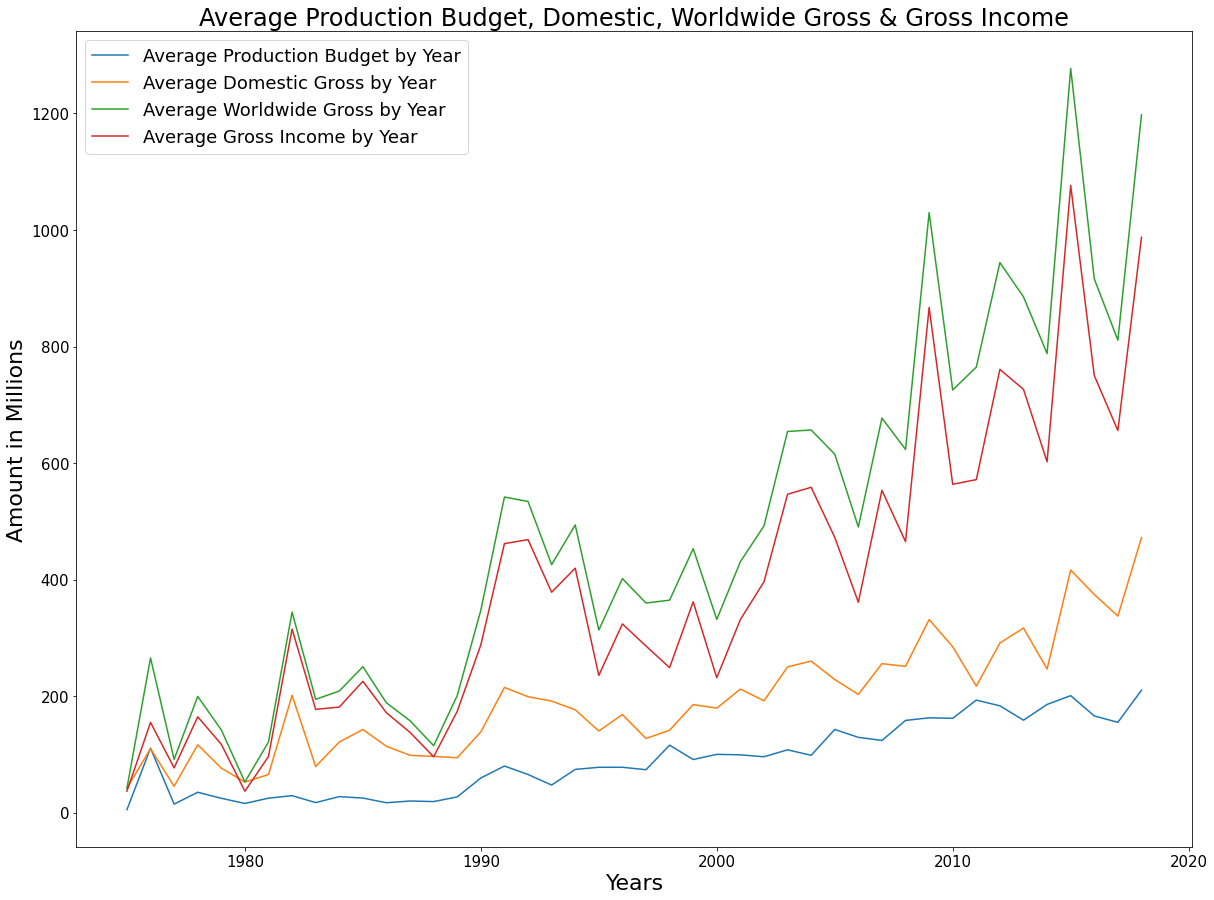

In [164]:
plt.figure(figsize=(20,15))
plt.plot(avg_by_year)
plt.legend(avg_by_year, fontsize= 18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Years", fontsize=22)
plt.ylabel("Amount in Millions", fontsize=22)
plt.title("Average Production Budget, Domestic, Worldwide Gross & Gross Income", fontsize=24)
plt.show

# Averages over the Years

All fours categories have increased over time. The Average Production Budget was 5,000,000 in 1975 and over time increased to 210,000,000 in 2018. The average domestic and worldwide gross were both approximately 42,000,000 dollars in 1975 and increased over time to approximately 472,000,000 and 1,197,100,00 in 2018. This data also illustrates that the average gross income of approximately 37,000,000 dollars in 1975 has increased to appriximately 987,000,000 dollars in 2018. 

# GroupBy Main Genre to isoloate Average Production Budget, Average Domestic Gross and Average Worldwide Gross. 

In [156]:
production_budget_genre_df = allmovies_df.groupby(["Main Genre"]).mean()["Production Budget"]/1000000
domestic_gross_genre_df = allmovies_df.groupby(["Main Genre"]).mean()["Domestic Gross"]/1000000
worldwide_gross_genre_df = allmovies_df.groupby(["Main Genre"]).mean()["Worldwide Gross"]/1000000
avg_by_genre = pd.DataFrame({"Average Production Budget by Genre": (production_budget_genre_df),
                            "Average Domestic Gross by Genre": (domestic_gross_genre_df),
                            "Average Worldwide Gross by Genre": (worldwide_gross_genre_df)})
avg_by_genre

,Average Production Budget by Genre,Average Domestic Gross by Genre,Average Worldwide Gross by Genre
Main Genre,,,
Action,190.50,376.95,987.08
Animation,127.69,254.13,699.99
Comedy,108.73,243.82,619.11
Crime,63.75,133.13,287.95
Drama,102.54,219.75,495.22
Family,83.67,121.48,275.80
Fantasy,137.41,248.71,709.34
History,101.67,113.91,306.48
Horror,121.00,273.45,625.77


# Bar Chart of Average Production Budget, Average Domestic Gross and Average Worldwide Gross broken down by Main Genre. 

<function matplotlib.pyplot.show(close=None, block=None)>

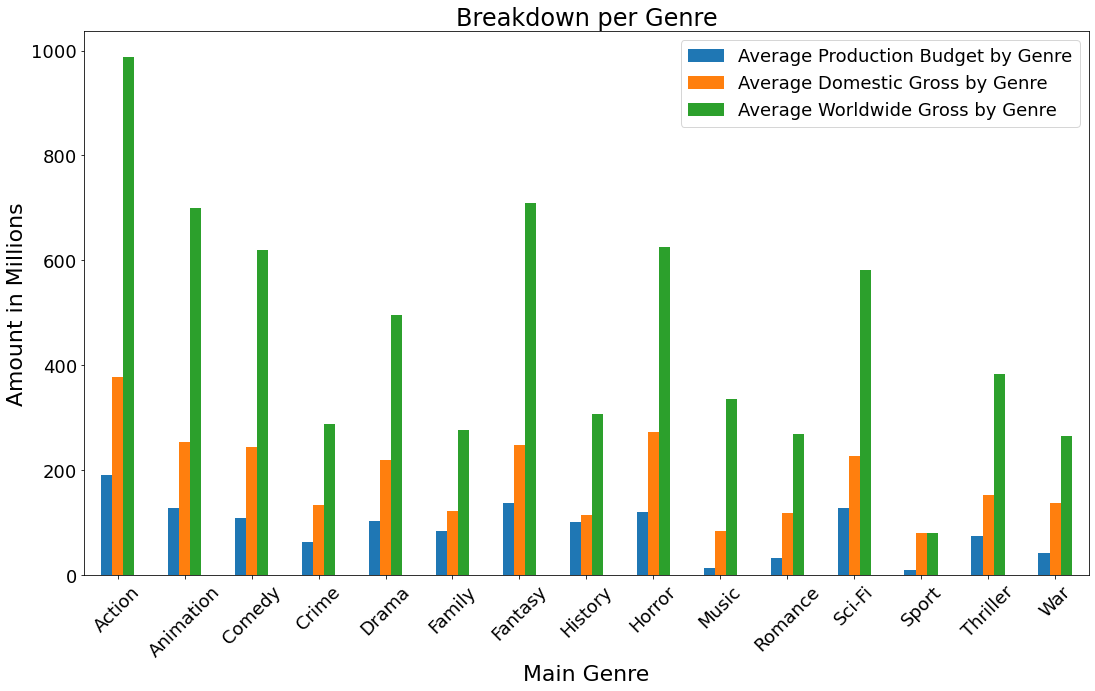

In [157]:
avg_by_genre.plot(kind='bar', fontsize=18,figsize=(18,10))
plt.title('Breakdown per Genre', fontsize=24)
plt.xlabel('Main Genre', fontsize=22)
plt.ylabel('Amount in Millions', fontsize=22)
plt.legend(fontsize=18)
plt.xticks(rotation=45)
plt.show

# Average Production Budget, Domestic Gross and Worldwide Gross per Genre

## Breakdown of average production costs per main movie genre reflects that Action movies account for the largest average budget per movie with an average of $190,500,000.00 per movie. Action movies also accounted for the highest average Worldwide and Domestic Gross.

# GroupBy to isolate amount of movies produced per studio. 

In [158]:
studios_df = allmovies_df.groupby(["Studio"])
studios_grouped_df = studios_df.size().sort_values(ascending=False)
studios_grouped_df = pd.DataFrame(studios_grouped_df)
studios_grouped_df

,0
Studio,
Walt Disney Pictures,38
Warner Bros,38
Universal Pictures,33
Paramount Pictures,32
20th Century Fox,23
Metro-Goldwyn-Mayer,14
Columbia Pictures,12
DreamWorks,10
Sony Pictures,9


# Pie chart to illustrate total breakdown of movies per Main Genre broken down by Studio. 

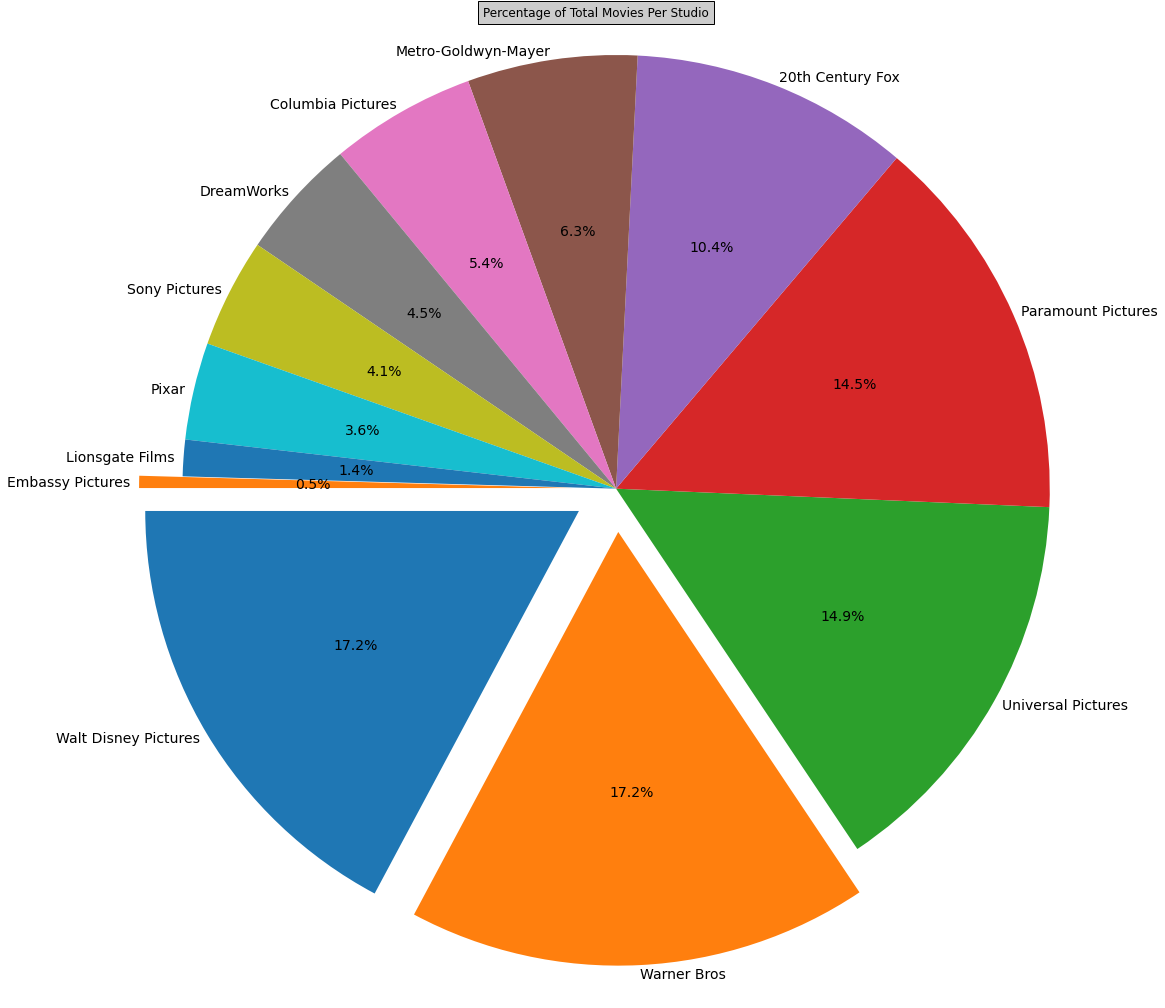

In [159]:
number_of_colors = 12

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Warner Bros", "Universal Pictures", "Paramount Pictures", "20th Century Fox", "Metro-Goldwyn-Mayer", "Columbia Pictures", "DreamWorks", "Sony Pictures", "Pixar", "Lionsgate Films", "Embassy Pictures"]

# The values of each section of the pie chart
sizes = [38, 38, 33, 32, 23, 14, 12, 10, 9, 8, 3, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0,0,0,0,0,0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,  labeldistance=1.02, autopct="%0.1f%%", textprops={'fontsize': 14}, startangle=180, explode=explode, shadow=False)
ax1.axis('equal') 
plt.title("Percentage of Total Movies Per Studio",bbox={'facecolor':'0.8', 'pad':5})
plt.show()

* Total Movies Per Studio

Breakdown of toal movies produces per studio reflect that Walt Disney Pictures and Warner Bros each had the greatest amount of movies with 38 each. Embassy Pictures accounts for the fewest amounts of movies with only one movie. 

# GroupBy to determine Average Production Budget per Studio in millions. 

In [160]:
studio_budget = allmovies_df.groupby(["Studio"]).mean()["Production Budget"]/1000000
studio_budget = pd.DataFrame(studio_budget)
studio_budget

,Production Budget
Studio,
20th Century Fox,86.78
Columbia Pictures,123.38
DreamWorks,91.80
Embassy Pictures,12.00
Lionsgate Films,92.67
Metro-Goldwyn-Mayer,57.39
Paramount Pictures,90.09
Pixar,134.50
Sony Pictures,93.78


<function matplotlib.pyplot.show(close=None, block=None)>

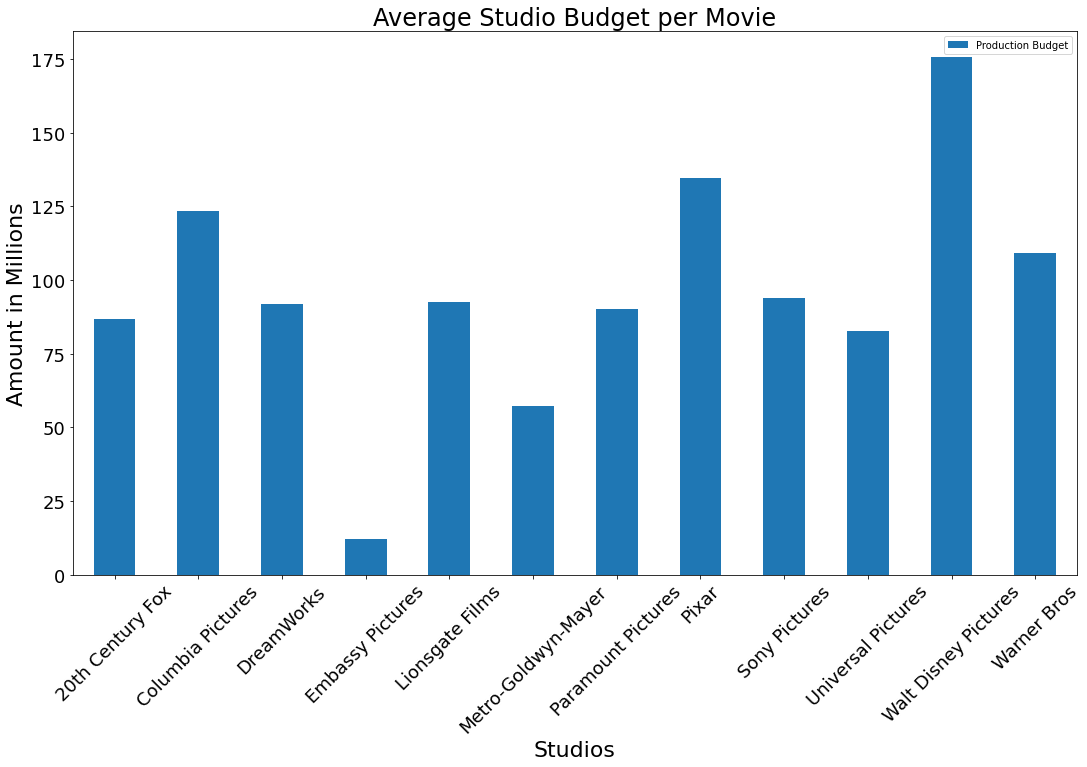

In [161]:
studio_budget.plot(kind='bar', fontsize=18,figsize=(18,10))
plt.title('Average Studio Budget per Movie', fontsize=24)
plt.xlabel('Studios', fontsize=22)
plt.ylabel('Amount in Millions', fontsize=22)
plt.xticks(rotation=45)
plt.show

*Average Production Budget Per Studio

Breakdown of average production budget per studio reflects Walt Disney Pictures averaged the highest production budget per movie with an average budget of $175,676,384.71. 

# GroupBy to isolate amount of Action genre movies produced by studio. 

In [162]:
action_counts=allmovies_df.groupby(['Studio', 'Main Genre']).size().reset_index(name='Counts')
action_genre="Action"
action_counts.loc[action_counts['Main Genre']==action_genre].sort_values(by='Counts', ascending=False)

,Studio,Main Genre,Counts
56,Walt Disney Pictures,Action,7
41,Sony Pictures,Action,3
46,Universal Pictures,Action,3
65,Warner Bros,Action,3
0,20th Century Fox,Action,1
8,Columbia Pictures,Action,1
21,Lionsgate Films,Action,1
29,Paramount Pictures,Action,1


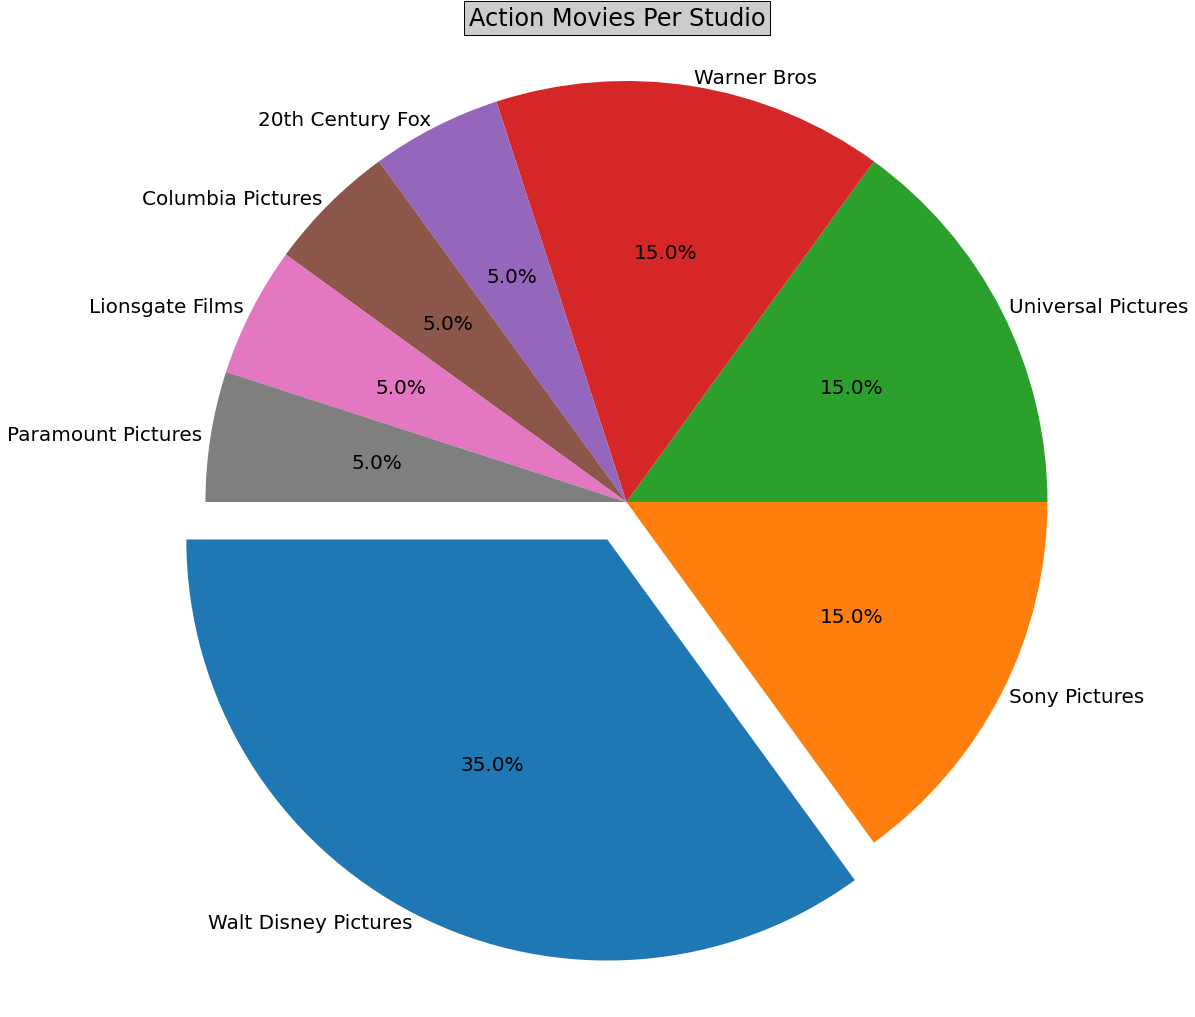

In [163]:
number_of_colors = 8

# Labels for the sections of our pie chart
labels = ["Walt Disney Pictures", "Sony Pictures", "Universal Pictures", "Warner Bros ", "20th Century Fox", "Columbia Pictures", "Lionsgate Films", "Paramount Pictures"]

# The values of each section of the pie chart
sizes = [7, 3, 3, 3, 1, 1, 1, 1]

# The colors of each section of the pie chart
colors = random.choices(list(mcolors.CSS4_COLORS.values()),k = number_of_colors)

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0,0,0,0,0,0,0,)

fig1, ax1 = plt.subplots(figsize=(18,18))
ax1.pie(sizes, labels=labels,labeldistance=1.02, autopct="%0.1f%%", startangle=180, textprops={'fontsize': 20}, explode=explode, rotatelabels = False, shadow=False)
ax1.axis('equal') 
plt.title("Action Movies Per Studio", fontsize=24,bbox={'facecolor':'0.8', 'pad':5})
plt.show()

# Action Movies Per Studio

Pie chart illustrates Walt Disney produced the most Action movies with a total count of 7. 

# Final Analysis

The question for this portion was if Genre would impact the Overall Production Budget, Domestic Gross and Worldwide Gross. The data illustrates that the genre does directly impact the average production budget. The average production budget for Action movies was approximately 190,000,000 dollars per movie which was approximately 50,000,000 dollars higher then the next highest category which was Fantasy at approximately 140,000,000 dollars per movie. Additionally, the average Domestic Gross (377 mil) and Worldwide Gross (987 mil) is also the highest for Action movies. This is approximately 100,000,000 dollars domestically and 80,000,0000 dollars wordlwide higher than the next highest genre's, which were Horror and Fantasy. This also confirms that the genre does impact Domestic and Worldwide Gross. 

It was interesting to note that Walt Disney pictures had one of the highest production counts but also averaged the highest production budget per movie. This would lead you to assume that if we looked primarily at the Action genre, we should expect to see Walt Disney Picture with the highest count. Data proves this to be correct as Walt Disney has the highest amount of Action movies with a total count of seven and an overall highest average production budget per movie with an average of approximately 176,000,000 dollars per movie. 

We aso asked the question; over the years how has a movie's budget changed, and has there been a correlating change in gross income, domestic and worldwide gross? All fours categories have increased over time. The Average Production Budget was 5,000,000 in 1975 and over time increased to 210,000,000 in 2018 which equates to an approximate increase of 4,100%. The average domestic and worldwide gross were both approximately 42,000,000 dollars in 1975 and increased over time to approximately 472,000,000 and 1,197,100,00 in 2018, which reflected increases of approximately 1,028% and 2,762%. This data also illustrates that the average gross income of approximately 37,000,000 dollars in 1975 has increased to approximately 987,000,000 dollars in 2018, which equaled an increase of approximately 2,580%. The data reflects that over the years all categories did increase; however, the rate of increase varied. 